## Project 2 - Classifying Spinal Cord Images based on Orientation

### Setup

In [1]:
import numpy as np
import pandas as pd

import skimage
from skimage.io import imread

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os


### Getting Training and Testing Data

In [2]:
#Giving Location
train_location = '../../P2/train/'
test_location = '../../P2/test/'

In [3]:
# Defining a train and test dict
train = {
    'name':[],
    'data':[],
    'orientation':[]
}

test = {
    'name':[],
    'data':[]
}

#### Train

In [4]:
# Getting all the orientation
orientations = []
base = train_location
# print (base)
with os.scandir(base) as entries:
    # print (entries)
    for entry in entries:
        if(entry.is_file() == False):
            orientations.append(entry.name)
orientations

['0', '1', '2', '3']

In [5]:
# Loading training images
base = train_location
for orientation in orientations:
    path = base + orientation
    # print (path)
    with os.scandir(path) as entries:
        # print (entries)
        for entry in entries:
            if(entry.is_file()):
                train['name'].append(int(str(entry.name).removesuffix('.png')))
                train['orientation'].append(int(orientation))
                image_location = path + '/' + str(entry.name)
                # print(image_location)
                train['data'].append(imread(image_location).tolist())

In [6]:
# Length Check
len(train['data'])

16000

In [7]:
# Putting the data in dataframe and sorting based on name because the orientaions are random when ordered by name
train_df = pd.DataFrame(train)
train_df = train_df.set_index('name')
train_df.sort_values(by=['name'], inplace=True)
train_df.head()

,data,orientation
name,,
100002,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
100003,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
100004,"[[14, 14, 14, 14, 13, 13, 13, 14, 14, 14, 14, ...",2
100005,"[[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 12...",3
100006,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3


In [8]:
x_train = []

for i,r in train_df.iterrows():
    x_train.append(r['data'])


In [9]:
# final training data
x_train = np.array(x_train)

In [10]:
# Dimension Check
x_train.shape

(16000, 224, 224)

In [11]:
# Make all images to have the shape (224, 224, 1)
x_train = np.expand_dims(x_train, -1)

In [12]:
# Dimension Check
x_train.shape

(16000, 224, 224, 1)

In [13]:
# Final y_train and Dimension Check
y_train = np.array(train_df['orientation'])
y_train.shape

(16000,)

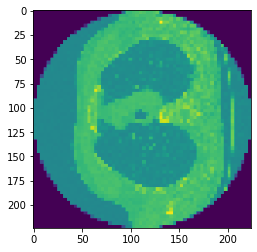

Orientation :  1


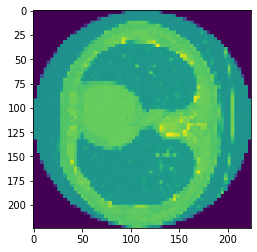

Orientation :  1


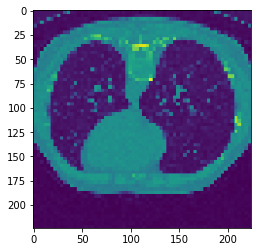

Orientation :  2


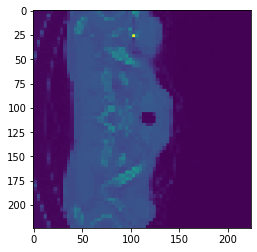

Orientation :  3


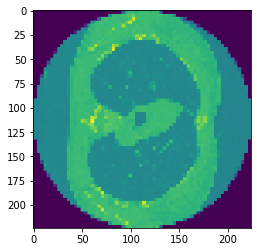

Orientation :  3


In [14]:
# Train Image view check
for i in range(5):
    plt.imshow(x_train[i])
    plt.show()
    print("Orientation : " , y_train[i])



#### Test

In [15]:
# Retreving test data
base = test_location
# print (base)
with os.scandir(base) as entries:
    # print (entries)
    for entry in entries:
        if(entry.is_file()):
            test['name'].append(int(str(entry.name).removesuffix('.png')))
            image_location = base + str(entry.name)
            # print(image_location)
            test['data'].append(imread(image_location).tolist())

In [16]:
# Length Check
len(test['data'])

4000

In [17]:
#  Putting the data in dataframe and sorting based on name to match testing output requirement
test_df = pd.DataFrame(test)
test_df = test_df.set_index('name')
test_df.sort_values(by=['name'], inplace=True)
test_df.head()

,data
name,
100000,"[[3, 3, 3, 3, 5, 5, 5, 3, 3, 3, 3, 4, 4, 4, 2,..."
100001,"[[0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2,..."
100010,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
100011,"[[13, 13, 13, 13, 134, 134, 134, 30, 30, 30, 3..."
100014,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [18]:
x_test = []

for i,r in test_df.iterrows():
    x_test.append(r['data'])


In [19]:
# Final Test data
x_test = np.array(x_test)

In [20]:
# Dimension Check
x_test.shape

(4000, 224, 224)

In [21]:
# Make all images to have the shape (224, 224, 1)
x_test = np.expand_dims(x_test, -1)

In [22]:
# Dimension Check
x_test.shape

(4000, 224, 224, 1)

#### Normalize Train and Test

In [37]:
# Normalizing the train and test data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test  = tf.keras.utils.normalize(x_test,  axis=1)

### Fully Connected Model

In [81]:
# Designing Model
# HeNormal initializing because of RELU
# Random Contrast for image augmenting
fully_connected_model = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomContrast(factor=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=tf.keras.initializers.HeNormal(seed=None), kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [82]:
# Compiling the Model
fully_connected_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [83]:
# Training the Model, only 10 epochs because after 10 epochs the the val_loss didn't have a drastic decrease and was only fluctuating
# So in order to avoid overfitting no more than 10 epochs
fully_connected_model.fit(x_train, y_train, epochs=10, validation_split=0.25, batch_size=30)

Epoch 1/10
400/400 [==============================] - 32s 78ms/step - loss: 0.7485 - accuracy: 0.7579 - val_loss: 0.3808 - val_accuracy: 0.8708
Epoch 2/10
400/400 [==============================] - 21s 51ms/step - loss: 0.3955 - accuracy: 0.8703 - val_loss: 0.3483 - val_accuracy: 0.8895
Epoch 3/10
400/400 [==============================] - 18s 45ms/step - loss: 0.3058 - accuracy: 0.9015 - val_loss: 0.4064 - val_accuracy: 0.8388
Epoch 4/10
400/400 [==============================] - 18s 45ms/step - loss: 0.2828 - accuracy: 0.9068 - val_loss: 0.2062 - val_accuracy: 0.9492
Epoch 5/10
400/400 [==============================] - 18s 45ms/step - loss: 0.2632 - accuracy: 0.9149 - val_loss: 0.2147 - val_accuracy: 0.9423
Epoch 6/10
400/400 [==============================] - 18s 45ms/step - loss: 0.2099 - accuracy: 0.9337 - val_loss: 0.3745 - val_accuracy: 0.8873
Epoch 7/10
400/400 [==============================] - 18s 45ms/step - loss: 0.2140 - accuracy: 0.9284 - val_loss: 0.1845 - val_accuracy:

In [84]:
# Model Summary
fully_connected_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_contrast_2 (RandomCo  (None, 224, 224, 1)      0         
 ntrast)                                                         
                                                                 
 flatten_13 (Flatten)        (None, 50176)             0         
                                                                 
 dense_48 (Dense)            (None, 256)               12845312  
                                                                 
 dense_49 (Dense)            (None, 128)               32896     
                                                                 
 dense_50 (Dense)            (None, 128)               16512     
                                                                 
 dense_51 (Dense)            (None, 4)                 516       
                                                     

In [85]:
# Saving model
fully_connected_model.save('saved_fully_connected.model')

INFO:tensorflow:Assets written to: saved_fully_connected.model\assets


### Convolutional Neural Network Model

In [77]:
# Designing Model
# 2 Convolutional Layers followed by max pool layers
# HeNoraml initializer for RELU
# No Augmentation because of high Accuracy
# Only 5 epochs to avoid overfitting
cnn_model = tf.keras.models.Sequential([
        keras.Input(shape=(224,224,1)),
        layers.Conv2D(10, padding='same', strides=(1,1), kernel_size=(3, 3), activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(10, padding='same', strides=(1,1), kernel_size=(3, 3), activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
        layers.Dense(128, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
        layers.Dense(4, activation="softmax"),
])


In [78]:
# Model Compile
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [79]:
# Model Train
cnn_model.fit(x_train, y_train, epochs=5, validation_split=0.25, batch_size=30)

Epoch 1/5
400/400 [==============================] - 88s 220ms/step - loss: 0.1871 - accuracy: 0.9314 - val_loss: 0.0304 - val_accuracy: 0.9945
Epoch 2/5
400/400 [==============================] - 81s 203ms/step - loss: 0.0151 - accuracy: 0.9958 - val_loss: 0.0170 - val_accuracy: 0.9955
Epoch 3/5
400/400 [==============================] - 80s 201ms/step - loss: 0.0094 - accuracy: 0.9965 - val_loss: 0.0267 - val_accuracy: 0.9950
Epoch 4/5
400/400 [==============================] - 80s 201ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0106 - val_accuracy: 0.9977
Epoch 5/5
400/400 [==============================] - 80s 200ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0115 - val_accuracy: 0.9977


In [80]:
cnn_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 10)      100       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 10)       0         
 2D)                                                             
                                                                 
 flatten_12 (Flatten)        (None, 31360)             0         
                                                                 
 dense_45 (Dense)            (None, 128)             

In [86]:
#Saving Model
cnn_model.save('cnn.model')

INFO:tensorflow:Assets written to: cnn.model\assets


### Predictions

In [ ]:
# # Loading Models
# fcn_model_loaded = tf.keras.models.load_model('saved_fully_connected_model.model')
# cnn_model_loaded = tf.keras.models.load_model('cnn.model')


#### Fully Connected Model

In [114]:
# Getting Prediction for fully connected Model
fcn_prediction = fully_connected_model.predict(x_test)

In [115]:
# Getting Orientaion
fcn_pred = []
for i in range(len(fcn_prediction)):
    fcn_pred.append(np.argmax(fcn_prediction[i]))

#### Convolutional Neural Network

In [116]:
# Getting Prediction for convolutional model
cnn_prediction = cnn_model.predict(x_test)

In [117]:
# Getting Orientaion
cnn_pred = []
for i in range(len(cnn_prediction)):
    cnn_pred.append(np.argmax(cnn_prediction[i]))

In [118]:
# Open both files
with open("../../P2/temp.csv") as f_in, open("../../P2/Assignment2_4KPredictions_Kishore_KandasamyBalakrishnan.csv", 'w') as f_out:
        # Transform the rest of the lines
    i=0
    # Writing in the format of Name,Actual Orientation, FullyConnectedModel predicted orientaion, Convolutional Model predicted orientation
    for line in f_in:
        f_out.write(line.removesuffix('\n') + ',' + str(fcn_pred[i]) + ',' + str(cnn_pred[i]) + '\n')
        i = i + 1

### Summary

<p>Convolutional Neural Network model provided a better accuracy with lesser parameters and lower epochs(lesser possibility of overfitting). Though the Dense FCN model has more parameters, the training times are similar. More epochs in the FCN model only led to overfitting and no significant increase in accuracy</p>